In [1]:
from network_evaluation_tools import gene_conversion_tools as gct
from network_evaluation_tools import data_import_tools as dit
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
wd = '/cellar/users/snwright/Data/Network_Analysis/'

# Version 2.0 
## Load Pathway Commons Raw Data (All interactions)
#### Source:https://www.pathwaycommons.org/archives/PC2/v11/PathwayCommons11.All.hgnc.sif.gz
Downloaded: Dec 22, 2021   
Last Updated: ?
Citation: Pathway Commons, a web resource for biological pathway data. Cerami E et al. Nucleic Acids Research (2011).  
A Note about filtering interactions: Pathway Commons also contains interactions between proteins and small molecules from the CHEBI database. These interactions will need to be filtered out as they are not protein-protein interactions.  
Also note: The text file has more lines than the sif file in Pathway Commons. However, the text file has some interactions that are unclear how to resolve so for this case we will use the sif file provided by Pathway Commons

In [23]:
PC_Raw_v2 = pd.read_csv(wd+'Network_Data_Raw/PathwayCommons11.All.hgnc.sif.gz', sep='\t', header=None)
print('Raw interactions in Pathway Commons v11:', PC_Raw_v2.shape[0])

Raw interactions in Pathway Commons v11: 1851007


In [24]:
# Filter all interactions that contain a CHEBI: item
PC_filt_v2 = PC_Raw_v2[(~PC_Raw_v2[0].str.contains(':')) & (~PC_Raw_v2[2].str.contains(':'))]
PC_edgelist_v2 = PC_filt_v2[[0, 2]].values.tolist()
print('Protein-Protein interactions in Pathway Commons v11:', len(PC_edgelist_v2))

Protein-Protein interactions in Pathway Commons v11: 1179000


In [25]:
# Sort each edge representation for filtering
PC_edgelist_sorted_v2 = [sorted(edge) for edge in PC_edgelist_v2]
PC_edgelist_sorted_df_v2 = pd.DataFrame(PC_edgelist_sorted_v2, columns=["symbol_n1", "symbol_n2"])

In [26]:
# Filter edgelist for duplicate nodes and for self-edges
PC_edgelist_filt_v2 = gct.filter_converted_edgelist(PC_edgelist_sorted_df_v2)

1179000 input edges
0 self-edges removed
0 edges with un-mapped genes removed
158697 duplicate edges removed
Edge list filtered: 0.43 seconds
1020303 Edges remaining


In [27]:
# Save genelist to file
gct.write_edgelist(PC_edgelist_filt_v2, wd+'/Processed_Data/PathwayCommons11_Symbol.sif')

Edge list saved: 1.52 seconds


# Version 1.0 (original)
## Load Pathway Commons Raw Data (All interactions)
#### Source: http://www.pathwaycommons.org/archives/PC2/v9/PathwayCommons9.All.hgnc.txt.gz
Downloaded: Dec 22, 2021 
Last Updated: May 25, 2017  
Citation: Pathway Commons, a web resource for biological pathway data. Cerami E et al. Nucleic Acids Research (2011).  
A Note about filtering interactions: Pathway Commons also contains interactions between proteins and small molecules from the CHEBI database. These interactions will need to be filtered out as they are not protein-protein interactions.  
Also note: The text file has more lines than the sif file in Pathway Commons. However, the text file has some interactions that are unclear how to resolve so for this case we will use the sif file provided by Pathway Commons

In [9]:
# Original 1503144
PC_Raw = pd.read_csv(wd+'Network_Data_Raw/PathwayCommons9.All.hgnc.sif.gz', sep='\t', header=None)
print('Raw interactions in Pathway Commons v9:', PC_Raw.shape[0])

Raw interactions in Pathway Commons v9: 1546602


In [11]:
# Original 968186
# Filter all interactions that contain a CHEBI: item
PC_filt = PC_Raw[(~PC_Raw[0].str.contains(':')) & (~PC_Raw[2].str.contains(':'))]
PC_edgelist = PC_filt[[0, 2]].values.tolist()
print('Protein-Protein interactions in Pathway Commons v9:', len(PC_edgelist))

Protein-Protein interactions in Pathway Commons v9: 987778


In [12]:
# Sort each edge representation for filtering
PC_edgelist_sorted = [sorted(edge) for edge in PC_edgelist]

In [19]:
PC_edgelist_sorted_df = pd.DataFrame(PC_edgelist_sorted, columns=["symbol_n1", "symbol_n2"])

In [20]:
# Original
# 968186 input edges
# 0 self-edges removed
# 0 edges with un-mapped genes removed
# 143511 duplicate edges removed
# Edge list filtered: 1.92 seconds
# 824675 Edges remaining
# Filter edgelist for duplicate nodes and for self-edges
PC_edgelist_filt = gct.filter_converted_edgelist(PC_edgelist_sorted_df)

987778 input edges
0 self-edges removed
0 edges with un-mapped genes removed
145017 duplicate edges removed
Edge list filtered: 0.51 seconds
842761 Edges remaining


In [21]:
# Save genelist to file
gct.write_edgelist(PC_edgelist_filt, wd+'/Processed_Data/PathwayCommons9_Symbol.sif')

Edge list saved: 0.78 seconds


# Changes

In [28]:
stats = pd.DataFrame({"v1":[1546602,987778, 842761], 
                           "v2":[1851007, 1179000,1020303]},
                           index=["input", "PPI", "filtered"])

In [29]:
nodes_v1 = set(np.array(PC_edgelist_filt)[:, 0]).union(set(np.array(PC_edgelist_filt)[:, 1]))
nodes_v2 = set(np.array(PC_edgelist_filt_v2)[:, 0]).union(set(np.array(PC_edgelist_filt_v2)[:, 1]))


Text(0, 0.5, 'Number of nodes')

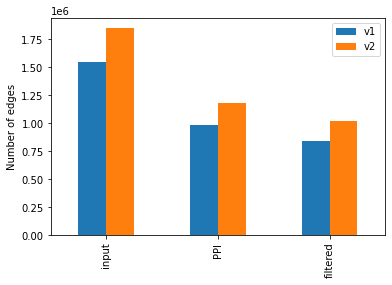

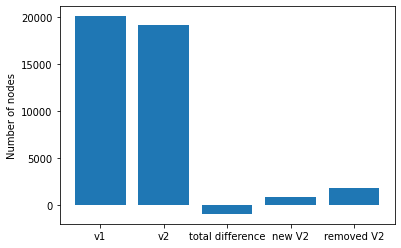

In [30]:
stats.plot.bar(ylabel="Number of edges")
plt.figure()
plt.bar(["v1", "v2", "total difference", "new V2", "removed V2"], [len(nodes_v1), len(nodes_v2), len(nodes_v2)-len(nodes_v1),
                                                           len(nodes_v2.difference(nodes_v1)), len(nodes_v1.difference(nodes_v2))])
plt.ylabel("Number of nodes")